# Assignment 6 Energy Loss

Calculate the energy loss of an alpha particle- that is, a Helium nucleus- that starts travelling with an kinetic energy of 5 MeV through a 5 $\mu$ m thick sheet of polyethylene, with a density of 0.94 g/cm $^3$ and a chemical composition of (CH $_2$) $_n$.  Separately calculate the energy loss to electrons, carbon nuclei and hydrogen nuclei.  Use a Monte Carlo technique to determine initial conditions, and then solve the classical scattering problems for the different target configurations. 

## Number of targets per unit area

Assume that the projectile (the helium nucleus) has a radius r and an area $A=\pi r^2$.  In reality, $r\approx 2\times 10^{-15}$ m, but we will let $r$ vary between 1e-15 and 1e-9 m.  If one assumes a perfectly straight trajectory through the film, that simply knocks anything in its way out of the film,  calculate and plot the number of electrons, hydrogen nuclei and carbon nuclei that are removed as a function of $r$.  

Assume that the carbon and hydrogen nuclei and all the electrons are stationary and uncorrelated, and uniformly distributed through the polyethylene.  In that case, we simply need to find the number density per volume, and multiply by the volume of a cross sectional area.  

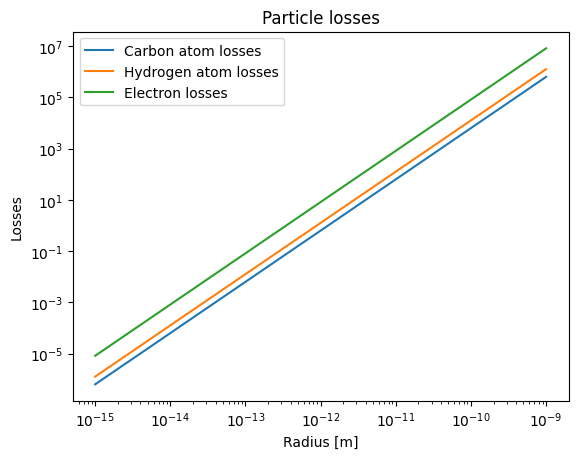

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.constants import e
from scipy.constants import m_p
from scipy.constants import m_e
from numpy import pi
from scipy.constants import epsilon_0

u       = scipy.constants.physical_constants["atomic mass constant"][0] # kg
m_alpha = scipy.constants.physical_constants["alpha particle mass"][0] # kg
q_alpha = 2 * e # C
q_e     = -e # C
t       = 5e-6 # m
r_min   = 1e-15 # m
r_max   = 1e-9 # m
rho     = 0.94 * 1e-3 / (1e-2)**3 # kg/m^3
m_C     = 12 * u # kg
q_C     = 6 * e # C
m_H     = m_p # kg
q_H     = e # C
m_CH2   = m_C + 2 * m_H + 8 * m_e # kg (this is actually METHYLENE)

def A(r):

    return np.pi * r ** 2

# mass removed by radius r in kg
def mass(r):

    # volume * density
    return A(r) * t * rho

def N_removed(r):

    m = mass(r)

    N_units = m / m_CH2
    N_C = N_units
    N_H = N_units * 2
    N_e = N_units * 13

    return np.array([N_C, N_H, N_e])

rs = np.linspace(1e-15, 1e-9, num=1000)
Ns = np.array([N_removed(r) for r in rs])

plt.title("Particle losses")
plt.ylabel("Losses")
plt.xlabel("Radius [m]")
plt.xscale("log")
plt.yscale("log")
plt.plot(rs, Ns[:,0], label="Carbon atom losses")
plt.plot(rs, Ns[:,1], label="Hydrogen atom losses")
plt.plot(rs, Ns[:,2], label="Electron losses")
plt.legend()
plt.show()

# Poisson Distribution
Write a small Monte Carlo to generate a random distribution of carbon atoms. Consider a square of polyethylene that is 1e-9x1e-9 m.  Place the carbon atoms by picking random numbers uniformly with the right number of carbon atoms per square centimeter; this should be physically equivalent to real polyethylene.

Now subdivide the area into many smaller squares with a mean number of atoms $n=0.1, 0.5, 1, 5, 10, 50$.  For each n, find the corresponding area and the length of the side of a small square that contains that number of atoms. Histogram(count) and plot the number of carbon atoms in the square, using the np.histogram2d function. Then histogram the histogram-- ie.  count the number of squares that contain a particular number of atoms.
To give an example, I give the results for 100 atoms in the larger square:
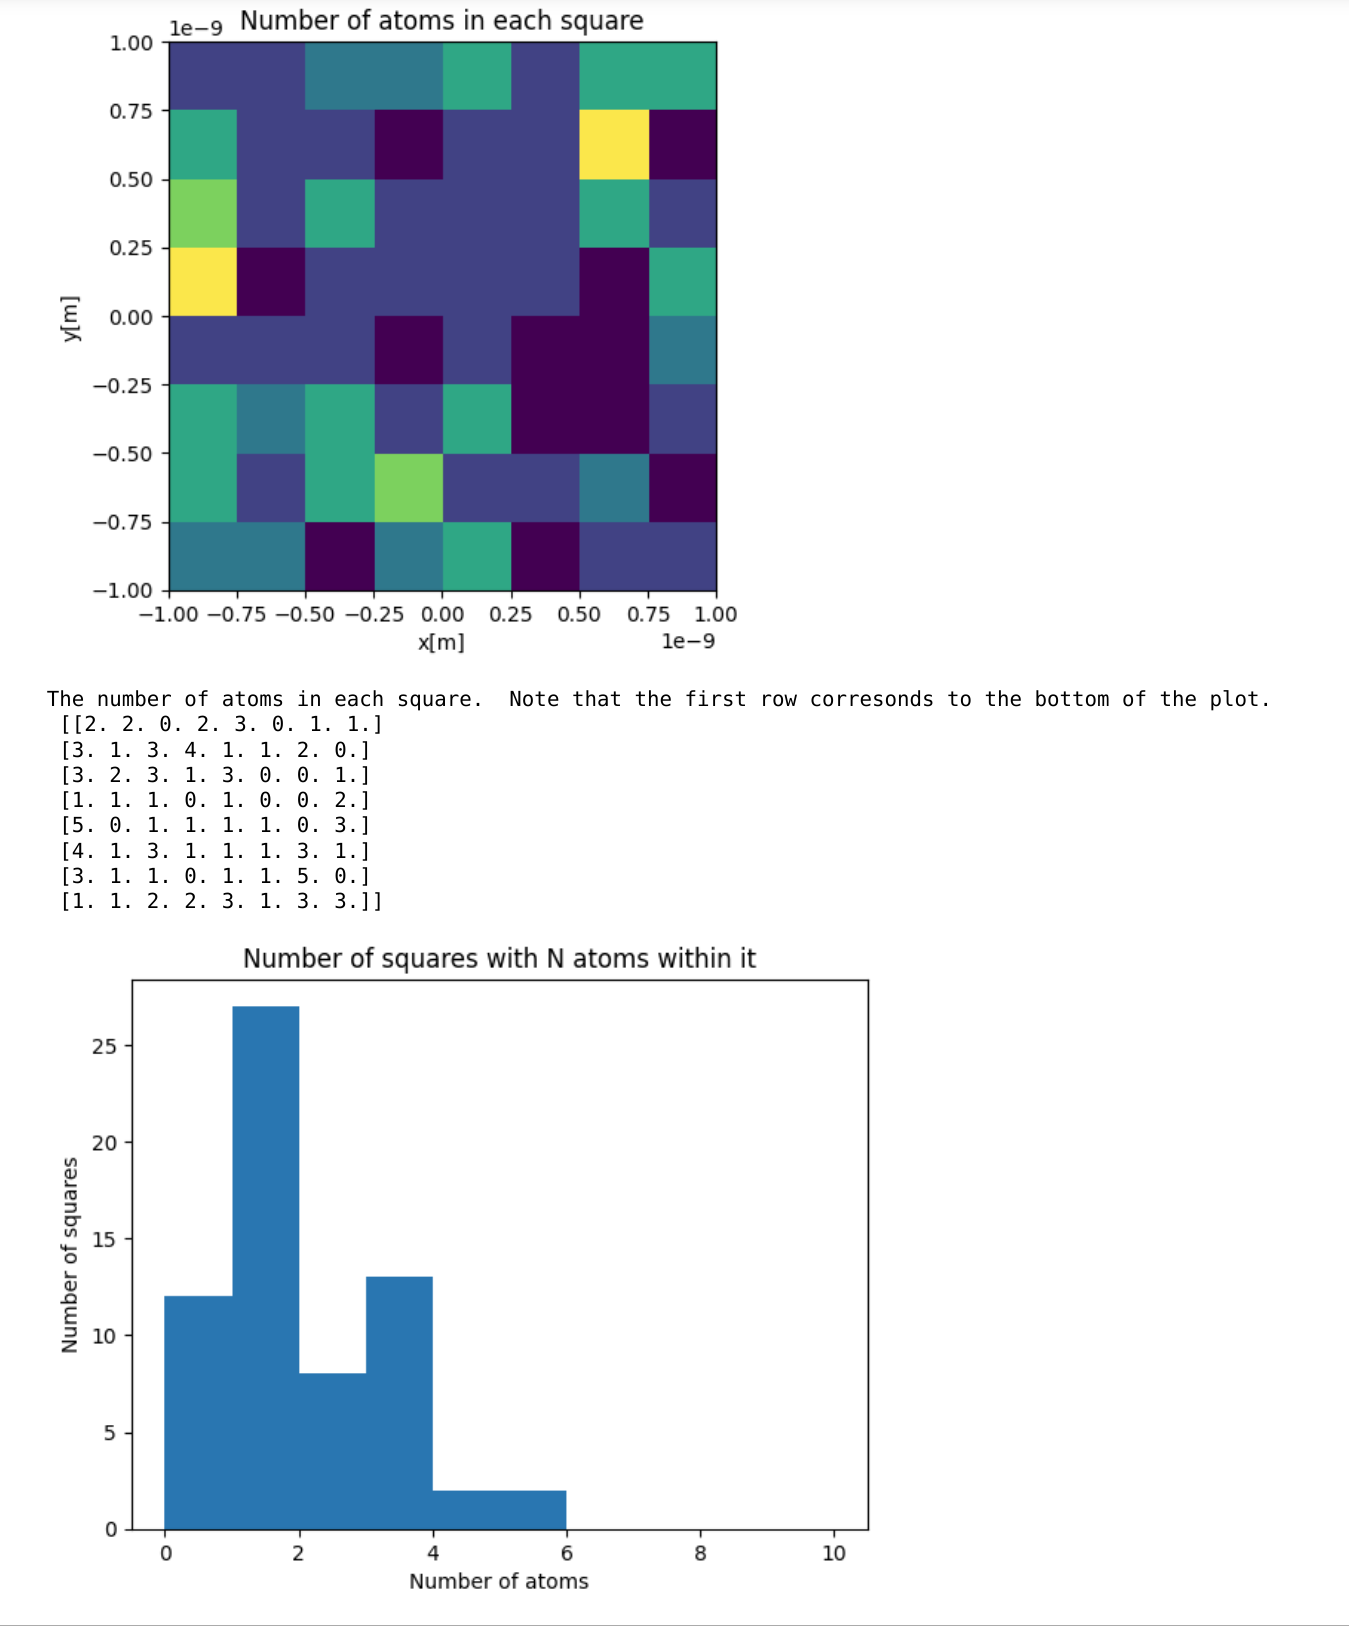

Now overlay one dimenstional histogram with the Poisson distribution $P(n)=\frac{\bar{x}^n}{n!}e^{-\bar{x}}.$  
The Poisson distribution occurs physically when the *rate* of events are fixed, but events are independent.  So, for instance, the number of atoms in one of the small boxes, or the number of radioactive decays per second.   

In [39]:
def poisson(n, mean):

    return mean ** n * np.exp(-mean) / scipy.special.factorial(n)

def N_atoms(width):

    total_mass = (2 * width) ** 2 * t * rho

    return int(total_mass / m_CH2)

def place_methylene(width):
    
    rng = np.random.default_rng(1012413)

    return (rng.random(size=(N_atoms(width), 2)) - 0.5)*np.array([width, width]) * 2

mean = 0.1:
	side length:	 0.000704 nm
	area:		 0.00000050 nm^2


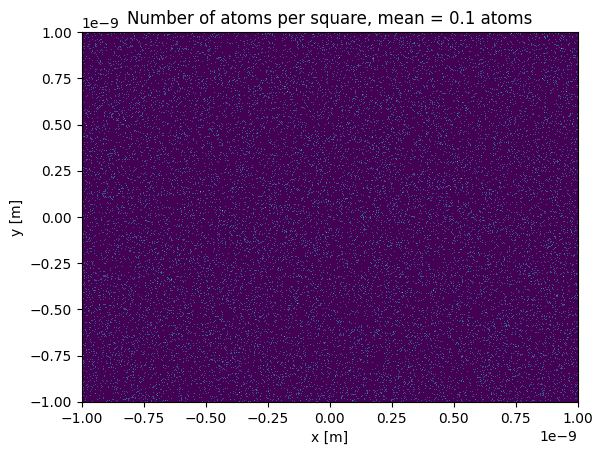

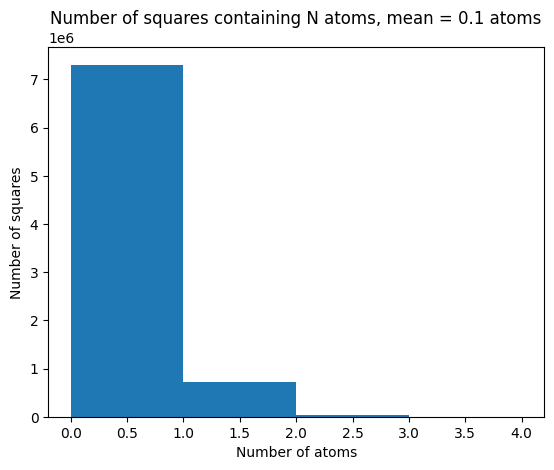

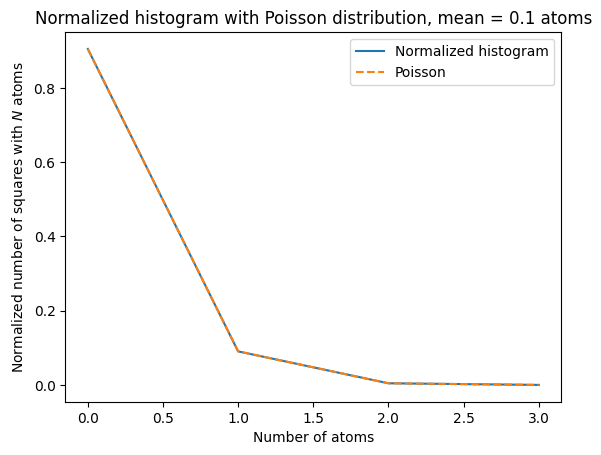

mean = 0.5:
	side length:	 0.001575 nm
	area:		 0.00000248 nm^2


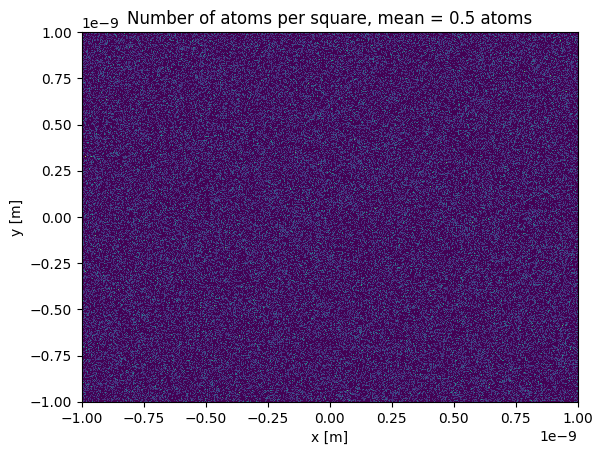

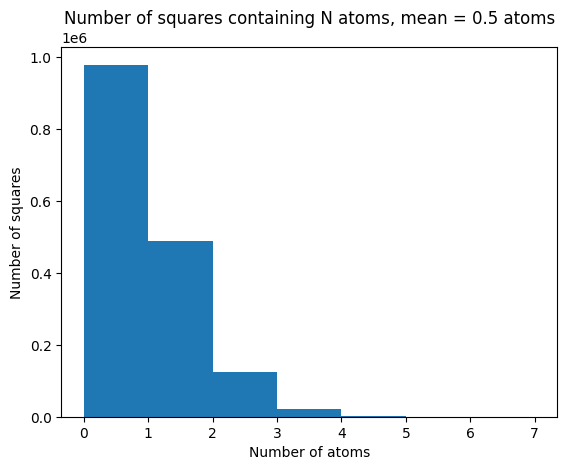

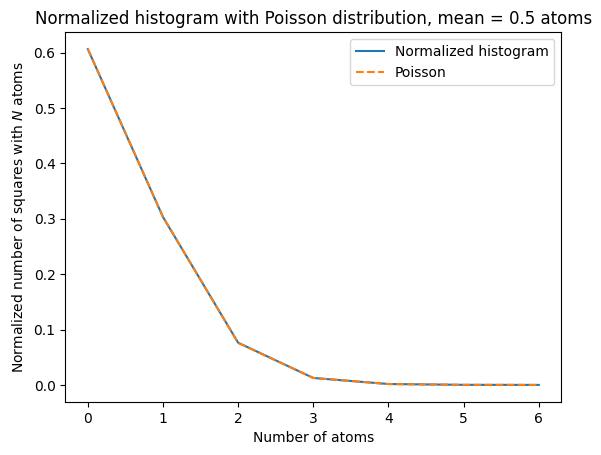

mean = 1.0:
	side length:	 0.002227 nm
	area:		 0.00000496 nm^2


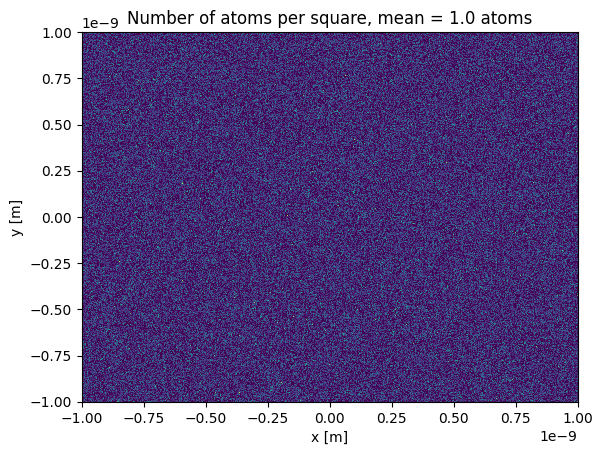

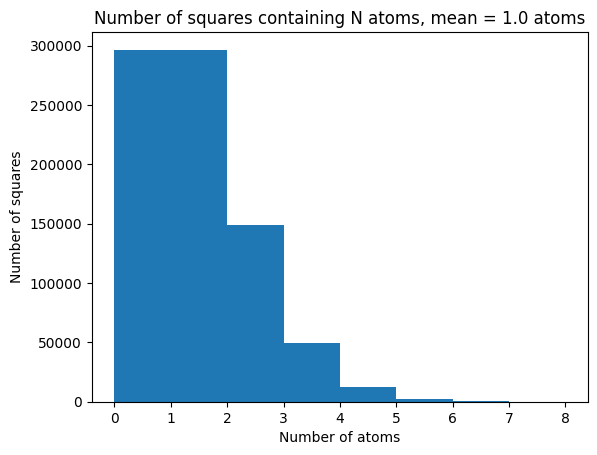

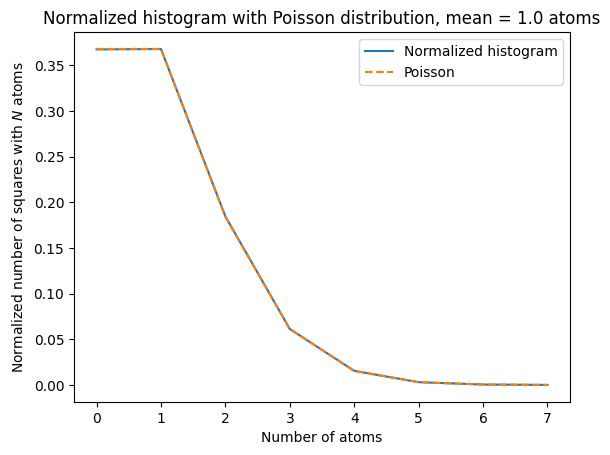

mean = 5.0:
	side length:	 0.004988 nm
	area:		 0.00002488 nm^2


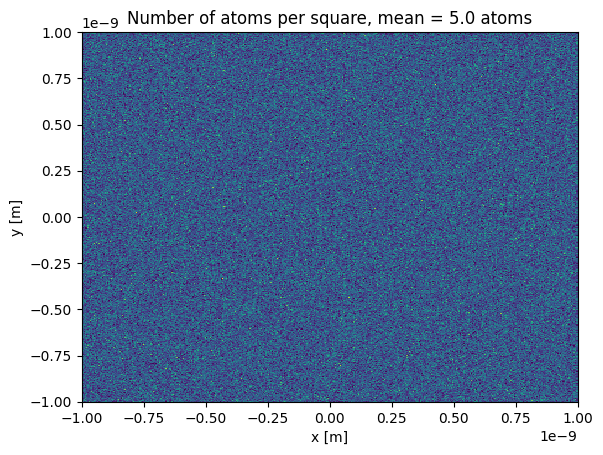

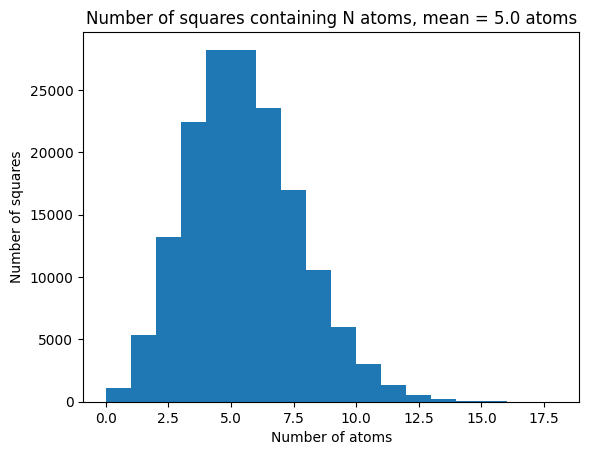

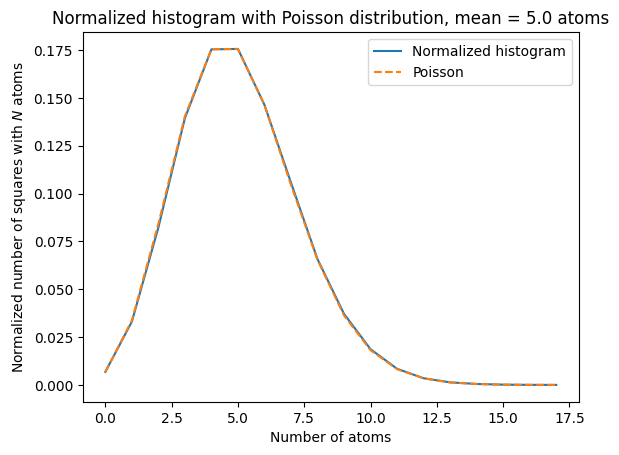

mean = 10.0:
	side length:	 0.007042 nm
	area:		 0.00004959 nm^2


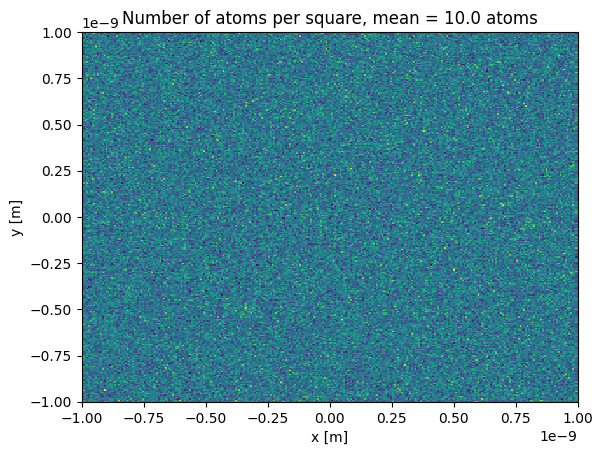

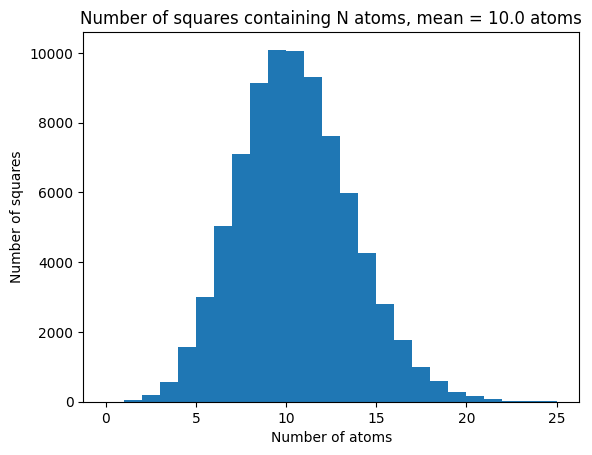

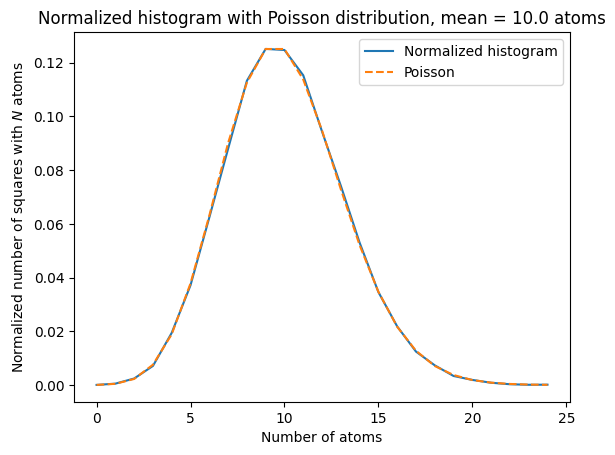

mean = 50.0:
	side length:	 0.015748 nm
	area:		 0.00024800 nm^2


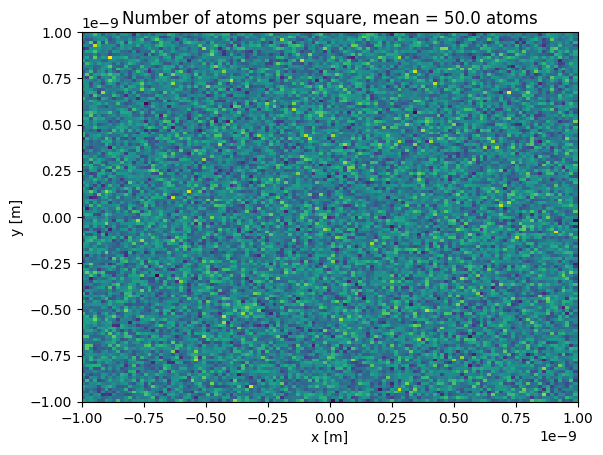

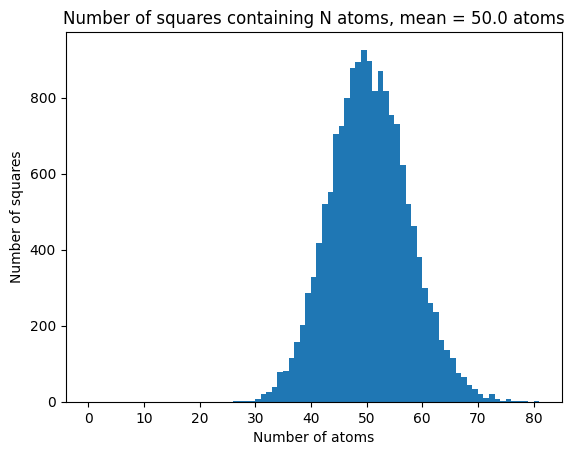

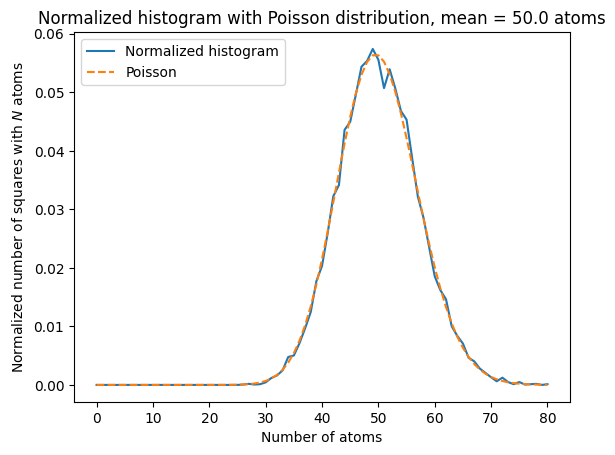

In [41]:
def square(mean):

    # N_atoms = mean * N_squares ** 2
    # N_squares = sqrt(N_atoms / mean)
    # number of squares along a length of the square (so total squares is this squared)
    w               = 1e-9 # m
    N_squares       = int(np.sqrt(N_atoms(w) / mean))
    dist            = place_methylene(w)
    square_length   = 2 * w / N_squares *1e9 # nm
    square_area     = square_length ** 2 # nm
    square_bins     = np.linspace(-w, w, num = N_squares + 1)
    hist            = np.histogram2d(dist[:,0], dist[:,1], bins=[square_bins, square_bins])[0]
    hist_flat       = hist.flatten()

    print(f"mean = {mean:.1f}:")
    print(f"\tside length:\t {square_length:.6f} nm")
    print(f"\tarea:\t\t {square_area:.8f} nm^2")

    plt.pcolor(square_bins, square_bins, hist)
    plt.title(f"Number of atoms per square, mean = {mean:.1f} atoms")
    plt.ylabel("y [m]")
    plt.xlabel("x [m]")
    plt.show()

    bins = [i for i in range(0, int(np.max(hist_flat))+1)]
    hist = plt.hist(hist_flat, bins)[0]

    plt.title(f"Number of squares containing N atoms, mean = {mean:.1f} atoms")
    plt.ylabel("Number of squares")
    plt.xlabel("Number of atoms")
    plt.show()

    h_prob = hist / np.sum(hist)

    plt.title(f"Normalized histogram with Poisson distribution, mean = {mean:.1f} atoms")
    plt.plot(bins[:-1], h_prob, label="Normalized histogram")
    plt.plot(bins[:-1], [poisson(n, mean) for n in bins[:-1]], label="Poisson", linestyle="dashed")
    plt.ylabel("Normalized number of squares with $N$ atoms")
    plt.xlabel("Number of atoms")
    plt.legend()
    plt.show()

for i in (0.1, 0.5, 1, 5, 10, 50):

    square(i)

## Rutherford (coulomb) scattering

The only force between nuclei and electrons is the coulomb force.  Calculate the interaction between an alpha particle (moving with kinetic energy 5 MeV) and an electron, a hydrogen nucleus, and a carbon nucleus, all starting at rest, as a function of impact parameter $b$.  Interpolate the results to get three continuous functions:  the energy lost by the alpha particle in the interaction (which is the same as the energy gained by the target), the angle by which the alpha particle is deflected, and the angle at which the target moves after the interaction; with all the angles and distances measured with respect to the incoming particle direction.  

The Coulomb force has infinite range, but electrons that are much closer to their nucleus than they are to the incoming particle won't be deflected/ionized.  Thus, we will cut off the integrations once the energy lost in a collision is less than the binding energy of an electron- pick a number that is a few electron volts. 

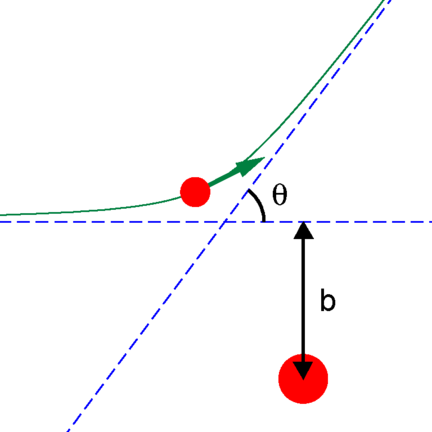

$$
\begin{aligned}
    \vec F_\alpha&=\frac{1}{4\pi\epsilon_0}\frac{q_\alpha q_2}{|\vec r_\alpha-\vec r_2|^3}(\vec r_\alpha-\vec r_2)
\end{aligned}
$$
$$
\begin{aligned}
    \frac{d}{dt}\begin{bmatrix}
        \vec a_\alpha \\
        \vec r_\alpha
    \end{bmatrix}&=
    \begin{bmatrix}
        \frac{1}{4\pi\epsilon_0}\frac{1}{m_\alpha}\frac{q_\alpha q_2}{|\vec r_\alpha-\vec r_2|^3}(\vec r_\alpha-\vec r_2) \\
        \vec v_\alpha
    \end{bmatrix} \\
    \frac{d}{dt}\begin{bmatrix}
        \vec a_2 \\
        \vec r_2
    \end{bmatrix}&=
    \begin{bmatrix}
        \frac{1}{4\pi\epsilon_0}\frac{1}{m_2}\frac{q_\alpha q_2}{|\vec r_2-\vec r_\alpha|^3}(\vec r_2-\vec r_\alpha) \\
        \vec v_2
    \end{bmatrix}
\end{aligned}
$$

For some other particle $q_2$. Only consider two dimensions: $x$ is along the initial velocity of the alpha particle and $y$ is the direction of the impact parameter.

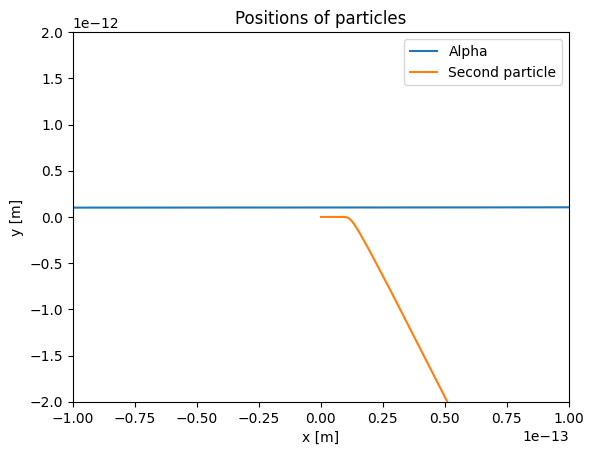

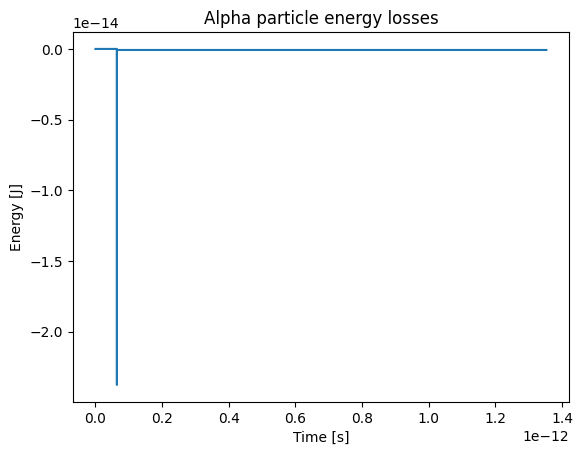

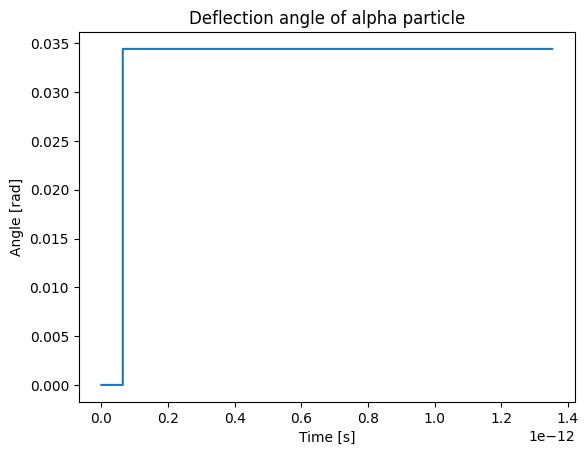

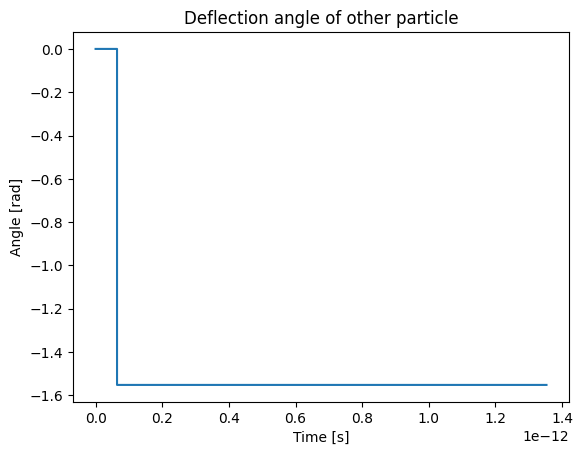

array(-7.47248772e-17)

In [49]:
K           = 5 * 1e6 * e
v_0         = np.sqrt(2 * K / m_alpha)
E_binding   = 5 * e # 5 eV

def coloumb(t, y, b, m_2, q_2):

    r_alpha = y[0:2]
    v_alpha = y[2:4]

    r_2 = y[4:6]
    v_2 = y[6:8]

    eq_r_alpha = v_alpha
    eq_v_alpha = 1 / 4 / pi / epsilon_0 * q_alpha * q_2 / m_alpha / np.linalg.norm(r_alpha - r_2) ** 3 * (r_alpha -  r_2)

    eq_r_2 = v_2
    eq_v_2 = 1 / 4 / pi / epsilon_0 * q_alpha * q_2 / m_2 / np.linalg.norm(r_2 - r_alpha) ** 3 * (r_2 - r_alpha)

    return np.concatenate((eq_r_alpha, eq_v_alpha, eq_r_2, eq_v_2))

def E_loss(v_alpha, q_2, delta_r):

    E = 1/2 * m_alpha * np.dot(v_alpha, v_alpha) + 1 / 4 / pi / epsilon_0 * q_alpha * q_2 / np.linalg.norm(delta_r)

    # since the alpha particle starts from far away, assume initial potential energy is zero
    # so initial total energy is just K
    return E - K

def event_large_x(t, y, b, m_2, q_2):

    r_alpha = y[0:2]

    # stop once the alpha particle has travelled 2e-5 m in either direction
    # so it doesn't take as long to solve
    return 2e-5 - np.abs(r_alpha[0])

def event_binding_E(t, y, b, m_2, q_2):

    r_alpha = np.array(y[0:2])
    v_alpha = y[2:4]
    r_2 = np.array(y[4:6])

    # break once K losses
    return E_binding - E_loss(v_alpha, q_2, r_alpha - r_2)

def interact(b, m_2, q_2, plot, use_energy_event = False):

    # come in from 1e-6 m to the left (approximately infinity on this scale)
    r_alpha_0 = [-1e-6, b]
    v_alpha_0 = [v_0, 0]
    r_2_0 = [0, 0]
    v_2_0 = [0, 0]
    y_0 = np.concatenate((r_alpha_0, v_alpha_0, r_2_0, v_2_0))

    events = [event_large_x]

    if use_energy_event:

        events.append(event_binding_E)

    result = scipy.integrate.solve_ivp(coloumb, [0, 1], y_0, args=(b, m_2, q_2), events=events)
    solutions = result.y
    r_alpha = np.array(list(zip(solutions[0], solutions[1])))
    r_2 = np.array(list(zip(solutions[4], solutions[5])))
    v_alpha = list(zip(solutions[2], solutions[3]))
    v_2 = list(zip(solutions[6], solutions[7]))

    E_losses = [E_loss(v, q_2, r_alpha - r_2) for v in v_alpha]
    alpha_thetas = [np.arctan2(v[1], v[0]) for v in v_alpha]
    other_thetas = [np.arctan2(v[1], v[0]) for v in v_2]

    deltaE = scipy.interpolate.interp1d(result.t, E_losses)
    alpha_theta = scipy.interpolate.interp1d(result.t, alpha_thetas)
    other_theta = scipy.interpolate.interp1d(result.t, other_thetas)

    if plot:

        plt.plot([sol[0] for sol in r_alpha], [sol[1] for sol in r_alpha], label="Alpha")
        plt.plot([sol[0] for sol in r_2], [sol[1] for sol in r_2], label="Second particle")
        plt.title("Positions of particles")
        plt.xlabel("x [m]")
        plt.ylabel("y [m]")
        plt.xlim(-1e-13, 1e-13)
        plt.ylim(-2e-12, 2e-12)
        plt.legend()
        plt.show()

        plt.plot(result.t, [deltaE(t) for t in result.t])
        plt.title("Alpha particle energy losses")
        plt.xlabel("Time [s]")
        plt.ylabel("Energy [J]")
        plt.show()

        plt.plot(result.t, [alpha_theta(t) for t in result.t])
        plt.title("Deflection angle of alpha particle")
        plt.xlabel("Time [s]")
        plt.ylabel("Angle [rad]")
        plt.show()

        plt.plot(result.t, [other_theta(t) for t in result.t])
        plt.title("Deflection angle of other particle")
        plt.xlabel("Time [s]")
        plt.ylabel("Angle [rad]")
        plt.show()

    # return E loss at the end of the integration interval
    return deltaE(result.t[-1])

event_large_x.terminal = True
event_binding_E.terminal = True

def interact_C(b, plot):

    return interact(b, m_C, q_C, plot)

def interact_H(b, plot):

    return interact(b, m_H, q_H, plot)

def interact_e(b, plot):

    return interact(b, m_e, q_e, plot, True)

# example output
interact_C(1e-13, True)


Now write a small Monte Carlo that places carbon atoms, hydrogen atoms and electrons in a small square that is 6e-11x6e-11 m. Then pick a position for an alpha particle to go through. If the alpha particle is within 6e-12 of an edge, throw it away. Using the functions you have just developed, calculate the energy lost to each electron, hydrogen and carbon and

Histogram the energy losses to electron, hydrogen, carbon, and the sum of the three separately.
Calculate how much energy is lost to each component, and the total energy lost.

bad throw
Energy lost to carbon nuclei: 6.84114724220009e-16 J.
Energy lost to hydrogen nuclei: 2.182807821443337e-16 J.
Energy lost to electrons: 5.315826275455146e-14 J.
Total energy lost: 5.40606582609158e-14 J.


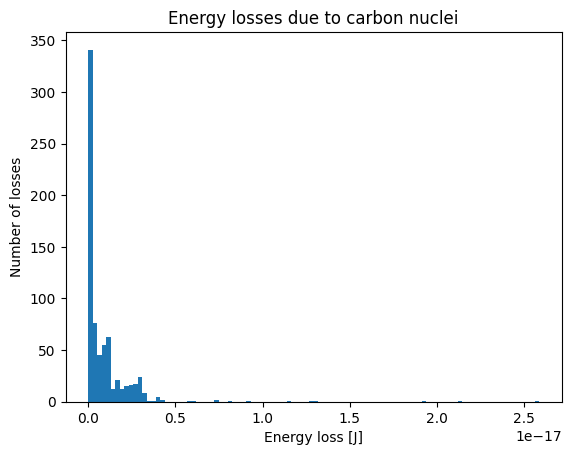

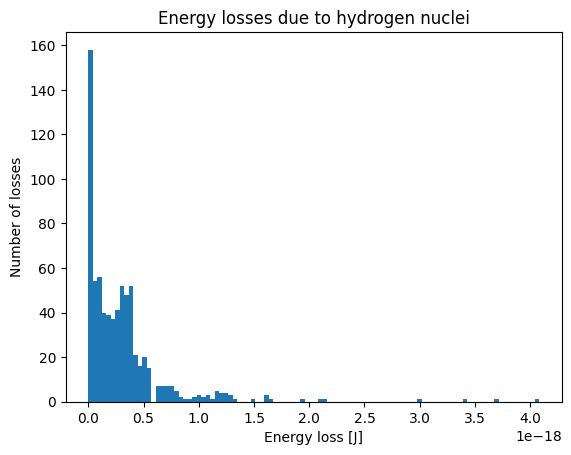

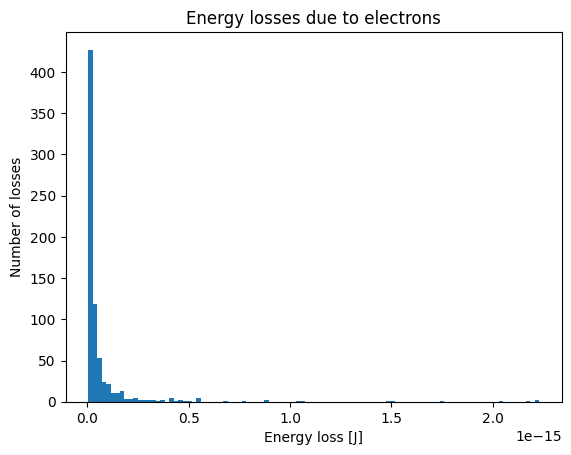

bad throw
bad throw
bad throw
bad throw
bad throw
bad throw
bad throw


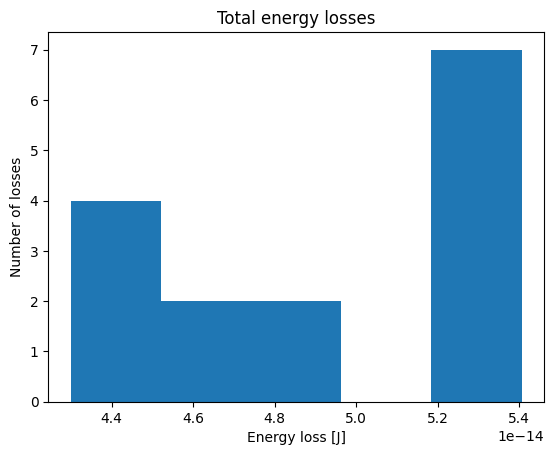

In [57]:
# square is [-3e-11, 3e-11] m so the total length is 6e-11 x 6e-11 m
w = 3e-11

def place_alpha(seed):

    rng = np.random.default_rng(seed)

    return (rng.random(size=(2)) - 0.5)*np.array([w, w]) * 2

def throw_alpha(seed, plot):

    boundary = 6e-12
    throw = place_alpha(seed)

    if np.abs(throw[0] - w) <= boundary \
        or np.abs(throw[0] + w) <= boundary \
        or np.abs(throw[1] - w) <= boundary \
        or np.abs(throw[1] + w) <= boundary:

        print("bad throw")
        
        # throw again
        return throw_alpha(seed + 1, plot)
    
    losses_C = []
    losses_H = []
    losses_e = []

    for methylene in place_methylene(w):

        b = np.linalg.norm(throw - methylene)
        loss_C = interact_C(b, False)
        loss_H = interact_H(b, False) * 2 # 2 hydrogens per molecule
        loss_e = interact_e(b, False) * 8 # 8 electrons per molecule

        # make it absolute so I am not binning negative energies so it looks better
        losses_C.append(np.abs(loss_C))
        losses_H.append(np.abs(loss_H))
        losses_e.append(np.abs(loss_e))

    loss_C = np.sum(losses_C)
    loss_H = np.sum(losses_H)
    loss_e = np.sum(losses_e)
    total_E_loss = loss_C + loss_H + loss_e

    if plot:
        
        print("Energy lost to carbon nuclei:", loss_C, "J.")
        print("Energy lost to hydrogen nuclei:", loss_H, "J.")
        print("Energy lost to electrons:", loss_e, "J.")
        print("Total energy lost:", total_E_loss, "J.")

        plt.hist(losses_C, 100)
        plt.title("Energy losses due to carbon nuclei")
        plt.xlabel("Energy loss [J]")
        plt.ylabel("Number of losses")
        plt.show()

        plt.hist(losses_H, 100)
        plt.title("Energy losses due to hydrogen nuclei")
        plt.xlabel("Energy loss [J]")
        plt.ylabel("Number of losses")
        plt.show()

        plt.hist(losses_e, 100)
        plt.title("Energy losses due to electrons")
        plt.xlabel("Energy loss [J]")
        plt.ylabel("Number of losses")
        plt.show()

    return total_E_loss

throw_alpha(1, True)

# histogram total E losses (this will take forever)
# use 15 throws
total_E_losses = [throw_alpha(i, False) for i in range(0, 15)]

plt.hist(total_E_losses, bins=5)
plt.title("Total energy losses")
plt.xlabel("Energy loss [J]")
plt.ylabel("Number of losses")
plt.show()